In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree



In [17]:
csv_file_name = "Cradit card Fraud.csv"

In [18]:
df = pd.read_csv( csv_file_name )
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
target_column_name = "isFraud"

In [20]:
categorical_target_column = True
#categorical_target_column = False

In [21]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 6362620
Total Number of Columns : 11


In [22]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

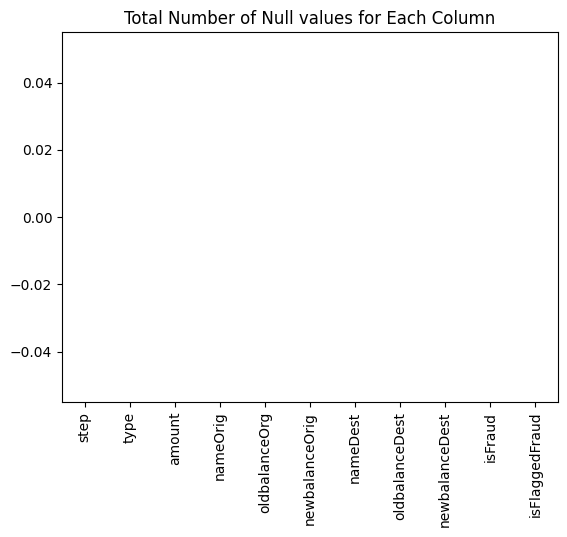

In [23]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")

There is no null value

In [24]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [25]:
droped_column_names = [ "nameOrig" ,  "nameDest" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [26]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')

Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------



C:\Users\User\AppData\Local\Temp\ipykernel_10556\3060275247.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


Maximum Null values in column (After Handling)  : 0


In [27]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    99.991466
True      0.008534
Name: count, dtype: float64


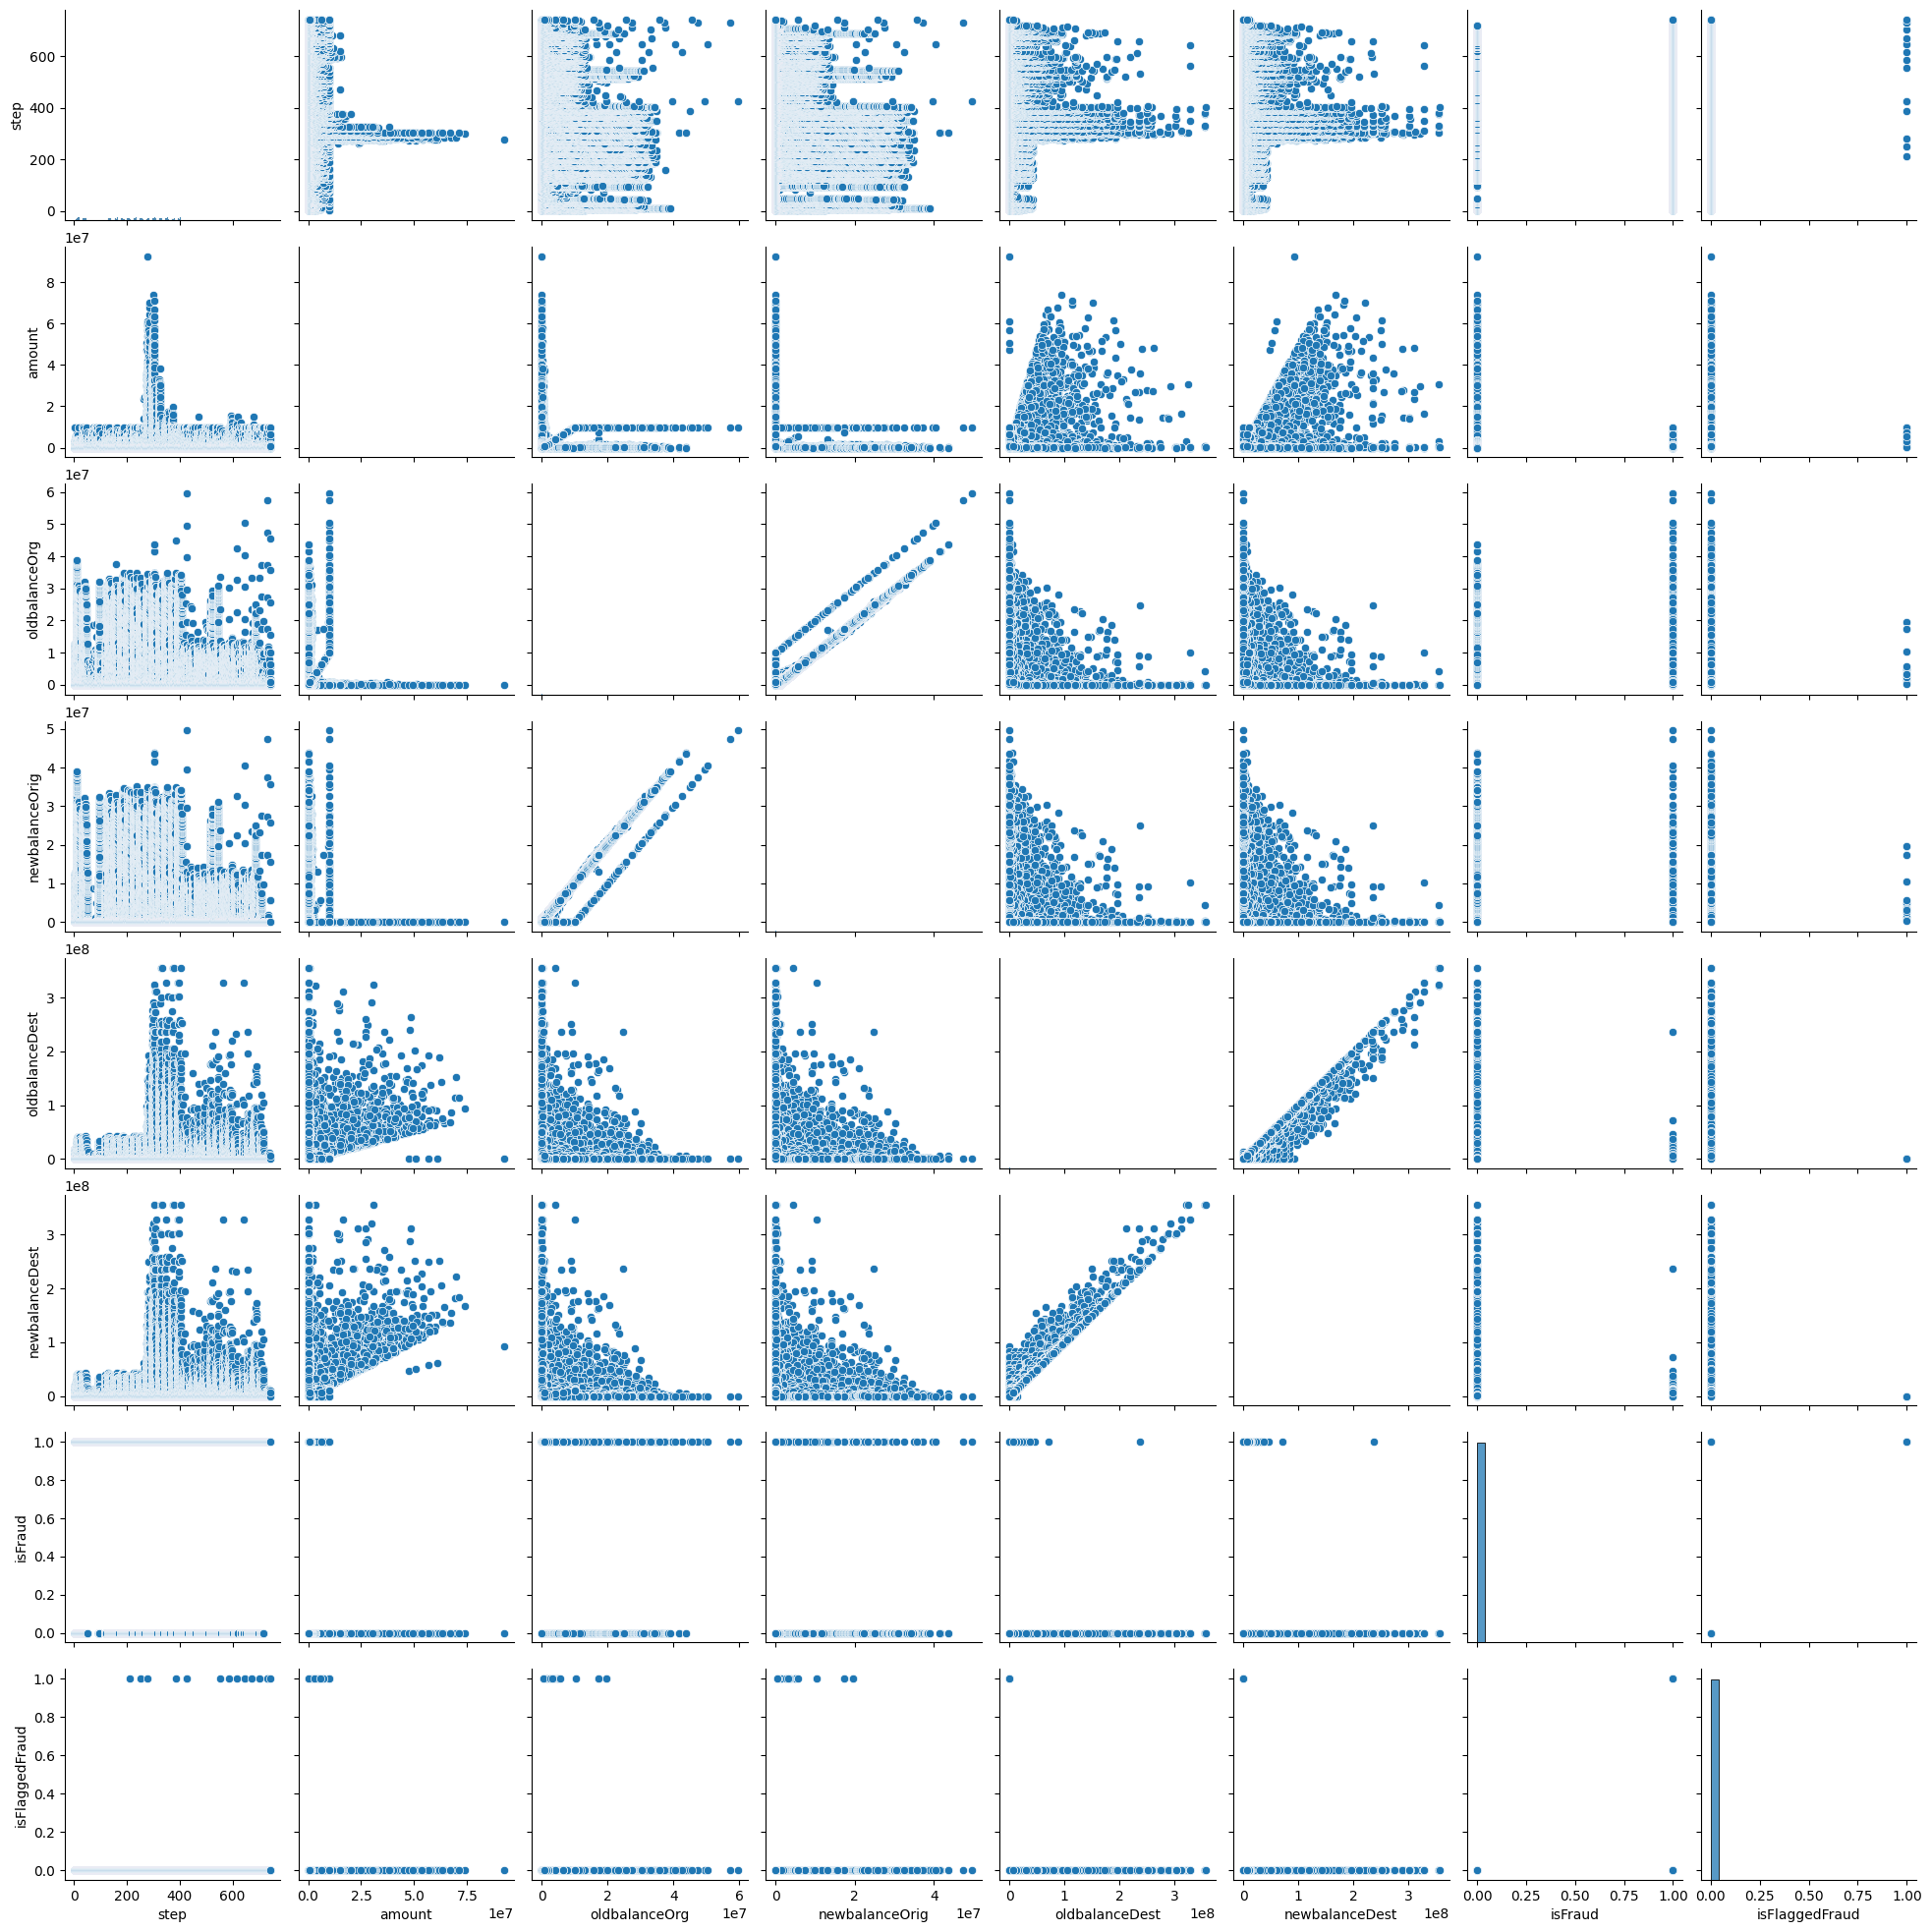

In [13]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

In [28]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


-----------------Unique Values per column--------------------------------




step                  743
type                    5
amount            5316900
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [29]:
categorical_columns = ["step" , "type" , "isFraud" ,"isFlaggedFraud"]
numeric_columns = [ "oldbalanceOrg	" , "newbalanceOrig", "oldbalanceDest","newbalanceDest", "amount"  ]

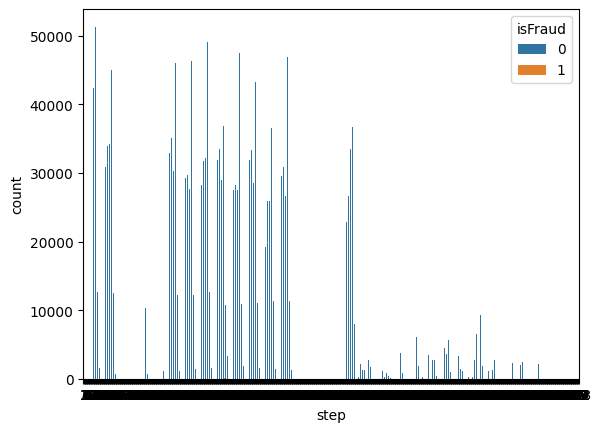

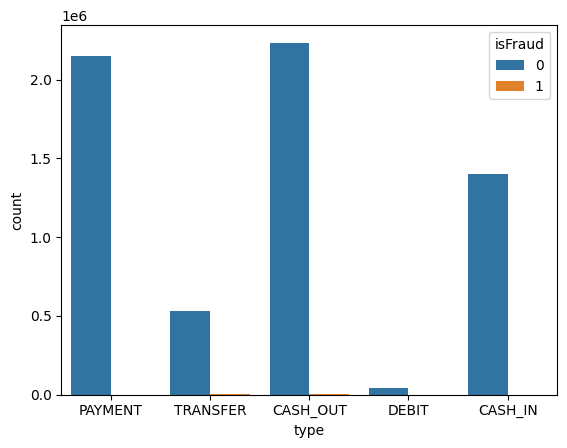

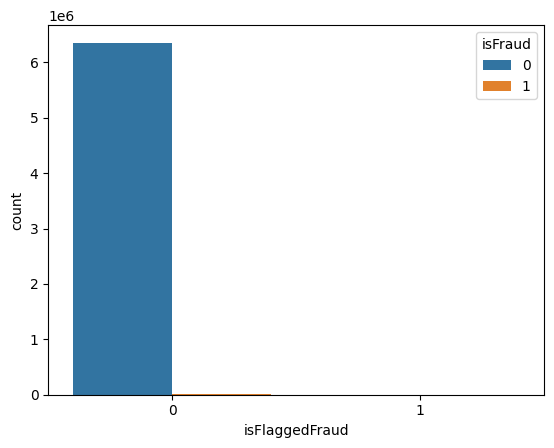

ValueError: Could not interpret value `oldbalanceOrg	` for `x`. An entry with this name does not appear in `data`.

In [30]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()
  
  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()
  
  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



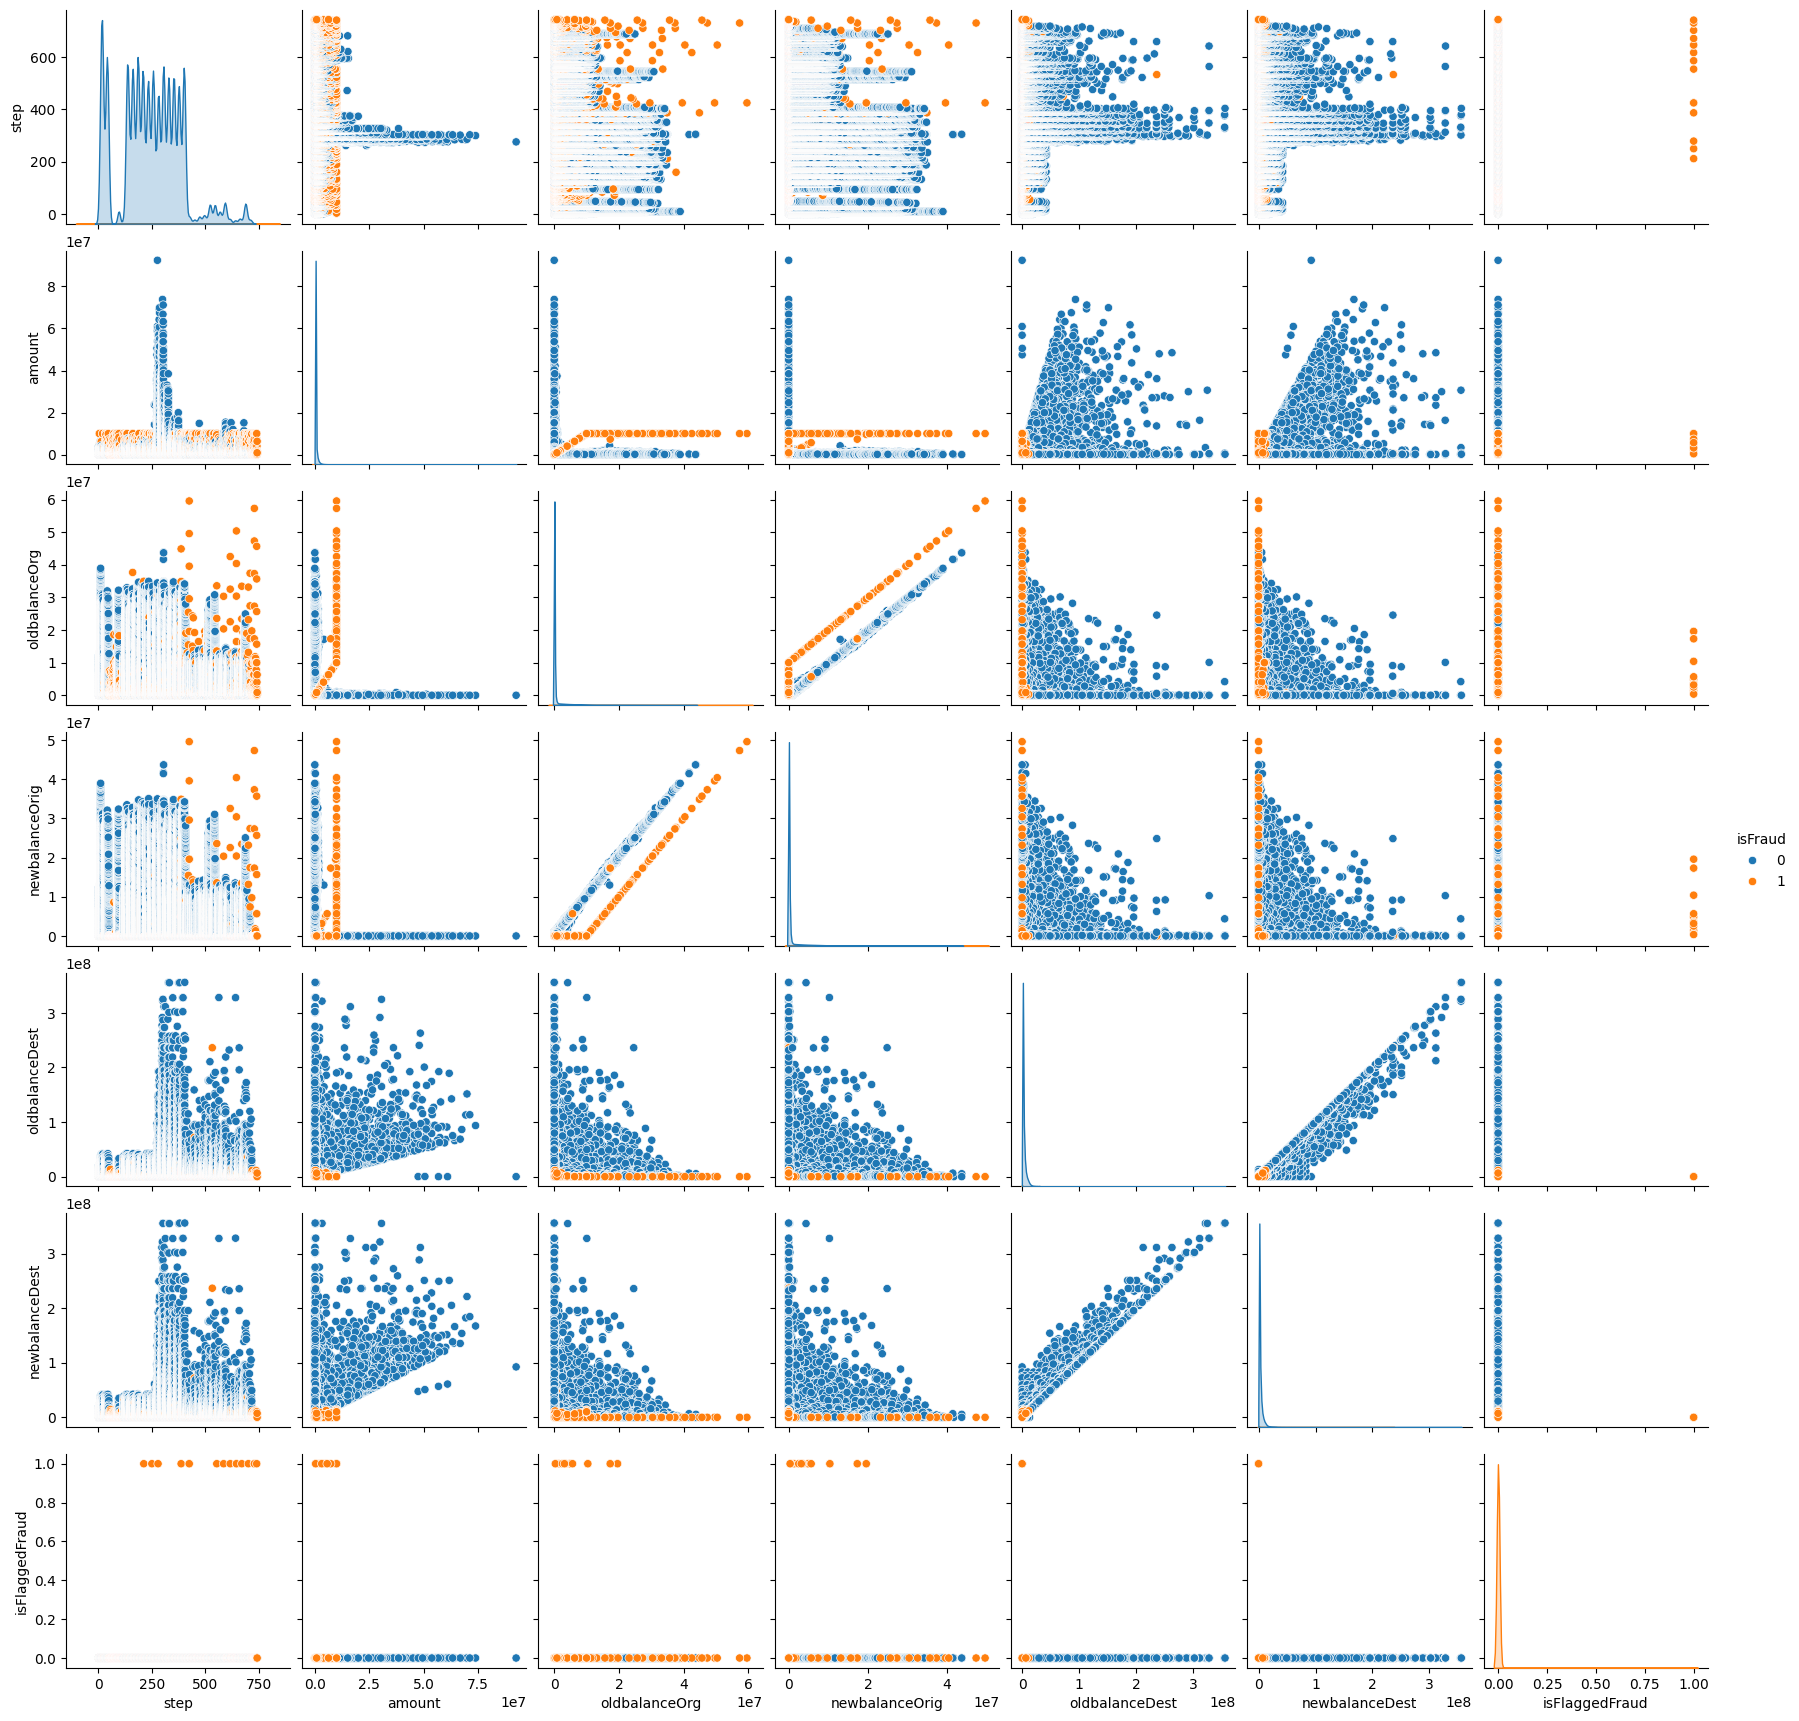

In [31]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

In the image that you sent me, the pair plot shows the correlation between different variables related to financial transactions, such as step, amount, old balance origin, new balance origin, old balance destination, new balance destination, if it’s fraud and if it’s flagged as fraud.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


<Axes: >

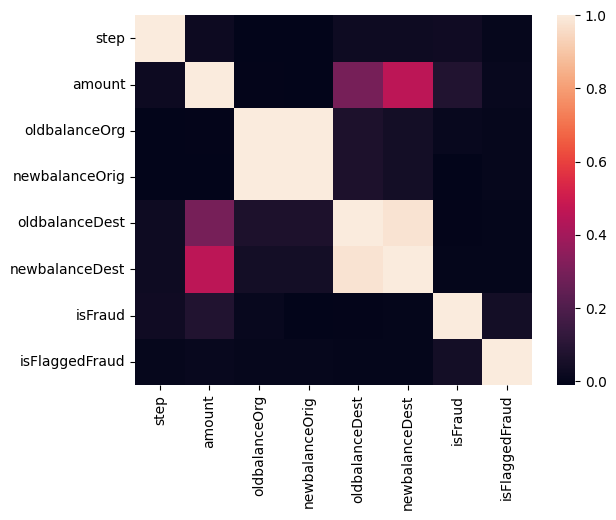

In [33]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION
---
Some of the highest positive correlations are between isFraud and isFlaggedFraud , oldbalanceOrg and newbalanceOrig , and oldbalanceDest and newbalanceDest . This means that these variables tend to vary together or increase together.

Some of the lowest or negative correlations are between step and amount , oldbalanceOrg and oldbalanceDest , and newbalanceOrig and newbalanceDest . This means that these variables tend to vary separately or decrease together.


In [34]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.51      0.66      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.75      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



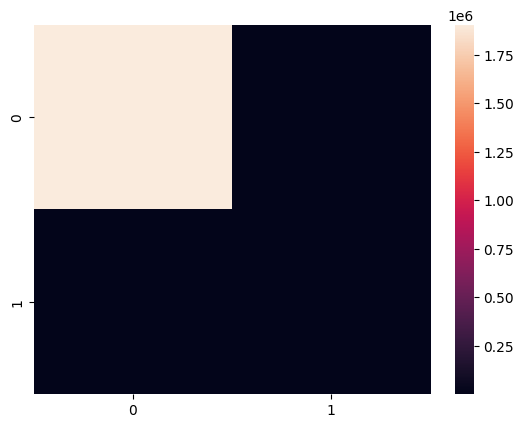

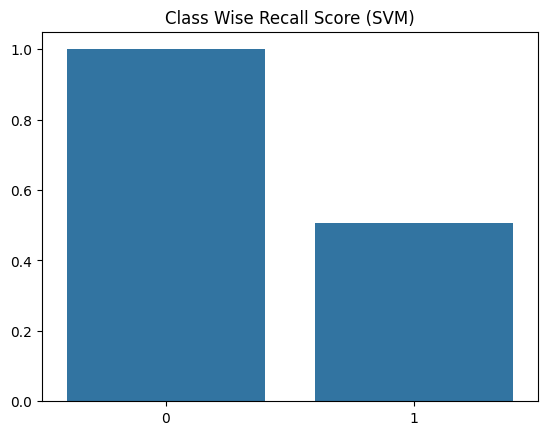

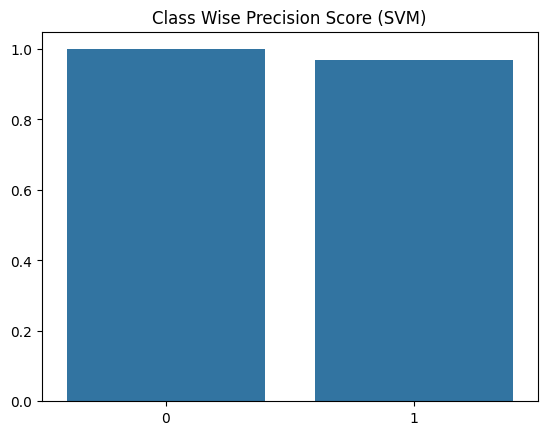

In [36]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.90      0.87      0.88      2464

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



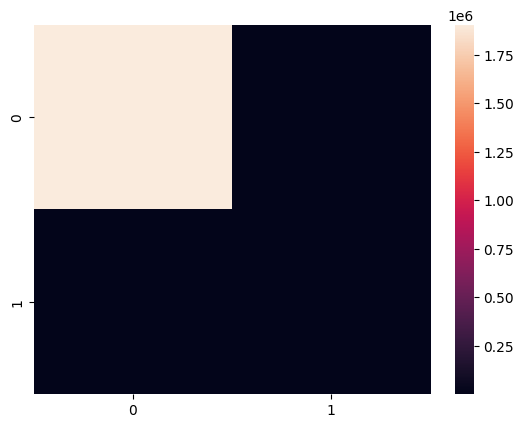

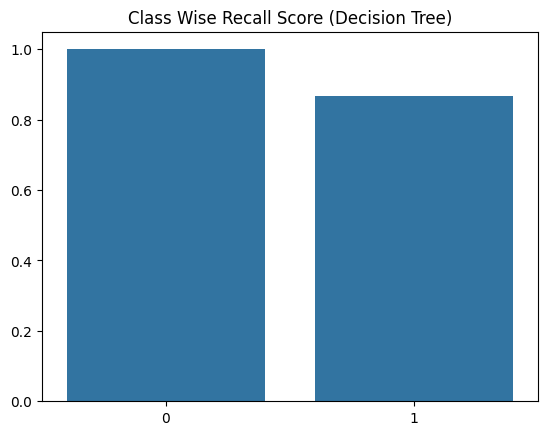

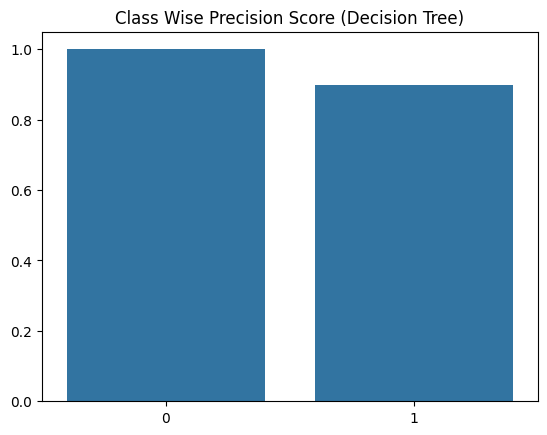

In [37]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")